# Polynomial Regression

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.style.use('tableau-colorblind10')

In [2]:
# Import data file
dataset=pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Histogram of charges (label)

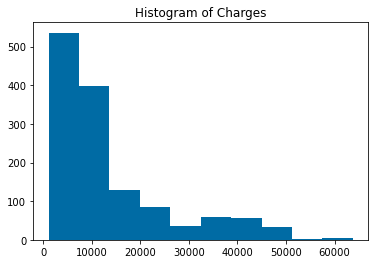

In [3]:
plt.hist(dataset['charges'])
plt.title("Histogram of Charges")
plt.show() 

Response is skewed to the right. Will perform regression analysis as is.

## Encoding categorical data

In [4]:
objList = dataset.select_dtypes(include = "object").columns
print (objList)

Index(['sex', 'smoker', 'region'], dtype='object')


In [5]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    dataset[feat] = le.fit_transform(dataset[feat].astype(str))

print (dataset.info())

dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB
None


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Create X and y arrays

In [6]:
# Create X set and y set. They are arrays and vectors
#X=dataset.iloc[:,0].values
X=dataset.iloc[:,:-1].values
print(X)
y=dataset.iloc[:,-1].values

print(y)

[[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   36.85  0.    0.    2.  ]
 [21.    0.   25.8   0.    0.    3.  ]
 [61.    0.   29.07  0.    1.    1.  ]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


### Creating polynomial features

In [7]:
# Create a matrix of features
from sklearn.preprocessing import PolynomialFeatures #Importing the class
poly_reg=PolynomialFeatures(degree=2)  # Creating an object of the class
X_poly=poly_reg.fit_transform(X)

### Creating training and test sets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_poly,y, test_size=0.2, random_state=44)

### Performing polynomial regression

In [9]:
from sklearn.linear_model import LinearRegression #Calling LinearRegression Class
regressor=LinearRegression(normalize=False, n_jobs=-1) #Creating an object of LinearRegression
regressor.fit(X_train, y_train) #Method of the linear regression class
#Note: LinearRegression Class takes care of Dummy Variable trap

LinearRegression(n_jobs=-1)

In [10]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -1,
 'normalize': False,
 'positive': False}

### Print coefficients and intercept

In [11]:
regressor.coef_

array([ 3.04201339e+14, -9.71116094e+02, -8.20892665e+02, -7.51782502e+02,
        1.56595650e+03, -1.01873406e+04, -2.98684930e+01,  1.01495690e+01,
        4.44201032e+01,  1.21393797e+01, -8.24997505e+00, -1.27768136e+02,
        3.79616850e+01, -8.20892665e+02, -3.05450104e+01,  3.08479226e+03,
       -5.76853784e+02, -2.11548850e+03,  2.20316059e+00, -2.84286119e+01,
        1.67312883e+03,  9.39912476e+01,  7.06802003e+01,  3.39867202e+01,
       -7.03606428e+02, -1.01873406e+04, -7.94823556e+02, -9.63237937e+02])

In [12]:
regressor.intercept_

-304201338528145.06

## Predicting Test set results

In [13]:
y_pred=regressor.predict(X_test) # Predicting values on test data
#print(y_pred)

In [14]:
#Actual values predicted
y_pred_actual=np.power(y_pred,10)
#print(y_pred_actual)

In [15]:
np.set_printoptions(precision=2) 
#  To display with two decimal points all printed values

### Representation of y_pred vs y_test in simple scatter plot and line representation.
The gold line represents an ideal model y_pred=y_test

The blue line represents the actual match between y_pred and y_test.

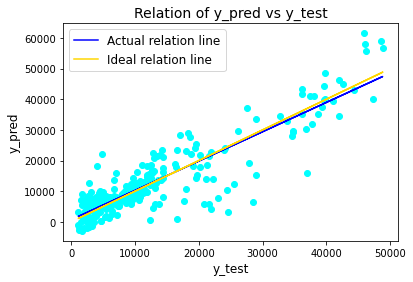

Slope: m= 0.96
Intercept: b= 694.93


In [16]:
plt.scatter(y_test, y_pred,  color='cyan')
m, b = np.polyfit(y_test, y_pred, 1) # 1 is the degree of the polynomial to fit.
plt.plot(y_test, m*y_test+b, color='blue', label="Actual relation line")
plt.plot(y_test, y_test, color='gold', label="Ideal relation line")
plt.title("Relation of y_pred vs y_test", fontsize=14)
plt.xlabel("y_test", fontsize=12)
plt.ylabel("y_pred", fontsize=12)
plt.legend(fontsize=12)
plt.show()
print("Slope: m=","{:.2f}".format(m))
print("Intercept: b=","{:.2f}".format(b))

### Calculating model's Aspect Ratio: AR
The aspect ratio is the length along the 45 degree line divided bythe width of the data points at the middle of the scatterplot.

A good aspect ratio will be at least 7:1 or greater.

Note: This assumes that the scatter plots are not exhibiting bias.

In [17]:
#Calculating aspect rati with correlation coefficient and R^2 between Y_pred and Y_test
from sklearn.metrics import r2_score
correlation_matrix = np.corrcoef(y_test, y_pred)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("R: ", "{:.2f}".format(correlation_xy))
print("R-squared between y_pred and y_test: ", "{:.2f}".format(r_squared))

R:  0.89
R-squared between y_pred and y_test:  0.80


In [18]:
# Aspect ratio calculation (precision)
AR=(1-correlation_xy)**(0.5-1)
print(" 'Aspect Ratio': ", "{:.2f}".format(AR))

 'Aspect Ratio':  3.06


A good correlation coefficient between y_pred and y_test is >=0.98, yielding an aspect ratio of 7 to 1 (minimum suggested when comparing results of a model against real values (y_test).